In [1]:
student_first_name = ['Jonas', 'Rob', 'Alex', 'John']
student_last_name = ['Gates', 'Hook', 'Wilson', 'Gray']
marks = [90, 79, 96, 85]

import pandas as pd

def create_students_df(first_names, last_names, marks):
    full_names = [f"{first} {last}" for first, last in zip(first_names, last_names)]
    
    df = pd.DataFrame({
        'Full Name': full_names,
        'Marks': marks
    })
    
    return df

students_df = create_students_df(student_first_name, student_last_name, marks)
print(students_df)


     Full Name  Marks
0  Jonas Gates     90
1     Rob Hook     79
2  Alex Wilson     96
3    John Gray     85


In [27]:
import pandas as pd

def create_new_df(valid_tickers: list) -> bool:
    file_path = '/cxldata/pet_mle/stock_fundamentals.csv'
    df = pd.read_csv(file_path)

    new_df = df[df['Ticker Symbol'].isin(valid_tickers)]
    #print(new_df)
    unique_tickers = sorted(new_df['Ticker Symbol'].unique().tolist())
    return unique_tickers == valid_tickers    

In [35]:
create_new_df(['PNC', 'AEP', 'PFG', 'BXP', 'PNW','KR', 'MMC', 'DIS', 'QCOM'])

False

In [36]:
sorted(new_df['Ticker Symbol'].unique().tolist())==['AMGN', 'BAX', 'CHK', 'CTL', 'FL', 'HPQ', 'PRU', 'RSG']

True

In [60]:
import pandas as pd

file_path = '/cxldata/pet_mle/user_data.csv'
user_data = pd.read_csv(file_path)
user_data.head()

,comment_id,user_id,page_id,ts
0,36869,60660,1231,2014-06-29 04:33:53
1,36868,119579,1462,2014-06-28 15:34:35
2,36867,119579,1462,2014-06-28 15:30:50
3,36866,119889,25,2014-06-28 15:17:02
4,36865,119889,22,2014-06-28 14:49:01


In [61]:
count_data = user_data.groupby('page_id').size().reset_index(name='comment_count').sort_values(by='comment_count')
count_data.tail()

,page_id,comment_count
0,3,3
4,22,4
41,2246,7
3,19,7
25,597,8


In [66]:
distinct_comments = user_data.groupby('page_id')['user_id'].nunique().reset_index()
distinct_comments.columns = ['page_id', 'distinct_user_count']
max_comments_page = distinct_comments.loc[distinct_comments['distinct_user_count'].idxmax()]
print(max_comments_page)

page_id                2246
distinct_user_count       4
Name: 41, dtype: int64


In [67]:
import pandas as pd

df = pd.read_csv('/cxldata/pet_mle/wine_quality.csv')

def categorize_quality(quality):
    if quality in range(7, 9):
        return 'High'
    elif quality in range(5, 7):
        return 'Medium'
    elif quality in range(3, 5):
        return 'Low'
    else:
        return 'Unknown'  # in case there are values outside expected ranges

df['WineClass'] = df['quality'].apply(categorize_quality)
wine_cat = df

In [72]:
def check_ver(instance):
    ver = instance.__version__
    return ver

import numpy as np
check_ver(np)

import pandas as pd
check_ver(pd)

'1.1.5'

In [78]:
import numpy as np

def compare_ndarray(arr1, arr2):
    if arr1.shape != arr2.shape:
        return False
    matching_indices = np.where(arr1 == arr2)[0]
    return matching_indices

In [79]:
a = np.array([0, 1, 2, 3, 4, 5, 6])
b = np.array([6, 5, 4, 3, 2, 1, 6])

compare_ndarray(a, b)

array([3, 6])

In [84]:
import pandas as pd
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Create a DataFrame for the target component
target = pd.DataFrame(iris.target, columns=['species'])

# Map target values to actual species names
target['species'] = target['species'].map(lambda x: iris.target_names[x])

# Merge data and target into a single DataFrame
iris_df = pd.concat([data, target], axis=1)

# Calculate required statistics
sepal_len_mean = data['sepal_length'].mean()
sepal_width_median = data['sepal_width'].median()
petal_len_std = data['petal_length'].std()
petal_width_min = data['petal_width'].min()
num_of_species = target['species'].nunique()

# Output the statistics
sepal_len_mean, sepal_width_median, petal_len_std, petal_width_min, num_of_species


(5.843333333333335, 3.0, 1.7652982332594667, 0.1, 3)

In [103]:
import pandas as pd

df1 = pd.DataFrame({
    'student_id': ['ID_1', 'ID_2', 'ID_3', 'ID_4', 'ID_5'],
    'name': ['John', 'Rebecca', 'Bruce', 'Ed', 'Michael'],
    'marks': [198, 186, 220, 230, 176]
})

df2 = pd.DataFrame({
    'student_id': ['ID_6', 'ID_7', 'ID_8'],
    'name': ['Keith', 'Hannah', 'Kenneth'],
    'marks': [166, 221, 189]
})

In [104]:
def display_df(df1, df2, name):
    merged_df = pd.concat([df1, df2], ignore_index=True)
    filtered_df = merged_df[merged_df['name'] == name]
    return filtered_df

In [105]:
display_df(df1, df2, "Keith")

,student_id,name,marks
5,ID_6,Keith,166


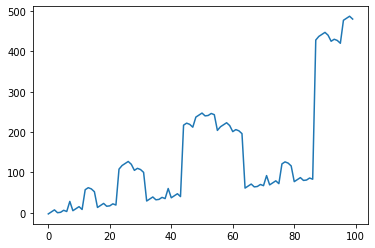

In [117]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(0,100)
y = 2*X^2 + 3*X - 5

plt.plot(X, y)
plt.show()

In [155]:
import numpy as np

def total_diff(arr1: list, arr2: list) -> int:
    arr1 = np.array(arr1)
    arr2 = np.array(arr2)
    diff_count = np.sum(arr1 != arr2)
    return diff_count

In [156]:
total_diff([1, 2, 3, 4, 6, 7],[1, 1, 3, 6, 7, 9])

4

In [219]:
import pandas as pd
import numpy as np

# Load the data from the CSV file
file_path = '/cxldata/pet_mle/time_series_data.csv'
data = pd.read_csv(file_path, header=None)  # Assuming no header in the file

# Extract the price column as a NumPy array
prices = data.values.flatten()

# Initialize lists to hold features and labels
X = []
y = []

# Window size
window_size = 5

# Create features and labels
for i in range(len(prices) - window_size):
    X.append(prices[i:i + window_size])
    y.append(prices[i + window_size])

# Convert lists to NumPy arrays
X = np.array(X)
y = np.array(y)

In [220]:
# Print the shapes of X and y to verify
print("X shape:", X.shape)
print("y shape:", y.shape)

print(list(X[0])==[123.43, 125.239998, 116.379997, 115.480003, 117.010002])

print(len(y))


X shape: (851259, 5)
y shape: (851259,)
True
851259
